<a href="https://colab.research.google.com/github/WarunaDissanayake1234/PyTorch-Tutorial/blob/main/PyTorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We shall design an algorithm for linear regression which allows us to understand two important concepts given below


Cost Function

Gradient Descent Algorithms

Import the necessary packages for creating a linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd
%matplotlib inline

sns.set_style(style= 'whitegrid')
plt.rcParams['patch.force_edgecolor'] = True

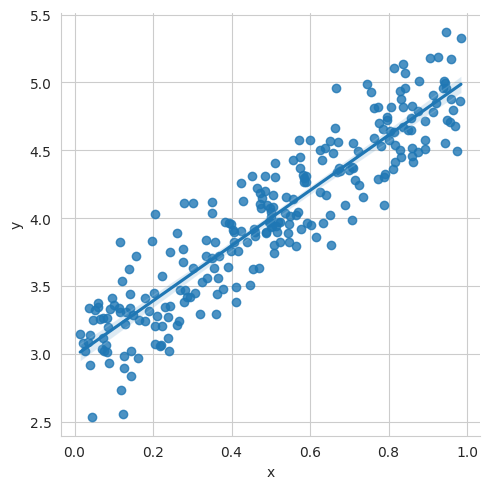

In [6]:
m = 2 # slope
c = 3 # interceptm = 2 # slope
c = 3 # intercept
x = np.random.rand(256)

noise = np.random.randn(256) / 4

y = x * m + c + noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

sns.lmplot(x ='x', y ='y', data = df)

Implement linear regression with PyTorch libraries

1 1


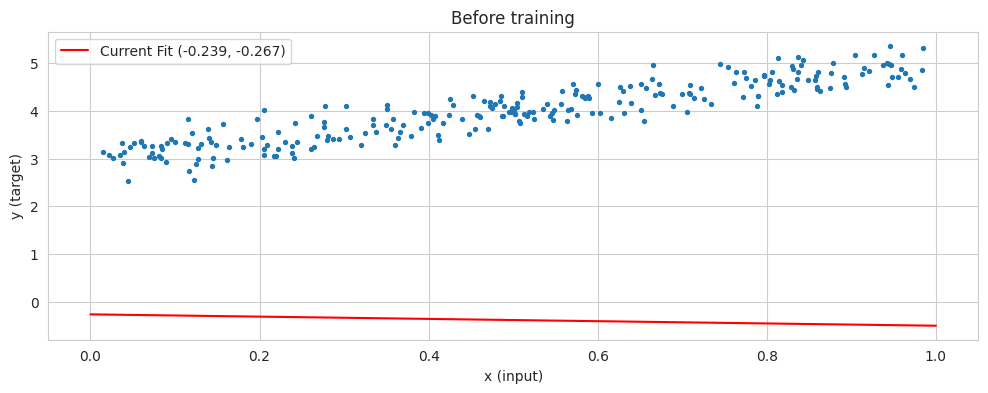

In [20]:
import torch
import torch.nn as nn
from torch.autograd import Variable

x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

class LinearRegressionModel(nn.Module):
   def __init__(self, input_dim, output_dim):
      super(LinearRegressionModel, self).__init__()
      self.linear = nn.Linear(input_dim, output_dim)

   def forward(self, x):
      out = self.linear(x)
      return out

input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
print(input_dim, output_dim)  # If you want to print the dimensions
model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()
[w, b] = model.parameters()

def get_param_values():
   return w.data[0][0], b.data[0]

def plot_current_fit(title = ""):
      plt.figure(figsize = (12,4))
      plt.title(title)
      plt.scatter(x, y, s = 8)
      w1 = w.data[0][0].item()  # Convert tensor to a single number
      b1 = b.data[0].item()  # Convert tensor to a single number
      x1 = np.array([0., 1.])
      y1 = x1 * w1 + b1
      plt.plot(x1, y1, 'r', label = 'Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
      plt.xlabel('x (input)')
      plt.ylabel('y (target)')
      plt.legend()
      plt.show()

plot_current_fit('Before training')

